# Installation of required libraries and basic setup

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import h5py
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
print("successfully imported required libraries")

successfully imported required libraries


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# from google.colab import auth
# auth.authenticate_user()
print("mounted to drive")

Mounted at /content/drive
mounted to drive


# Testing the dataset 

In [ ]:
print(os.getcwd())
os.chdir('/content/drive/MyDrive/Train/img')
print(os.getcwd())

/content
/content/drive/MyDrive/Train/img


In [ ]:
# Testing the dataset 
path_single = r"\train\img\image_2000.h5"
path_single_mask = r'\train\mask\mask_2000.h5'

ls-> ['img']
input data shape: (128, 128, 14)
data ndvi shape  (128, 128) f_data shape:  (1, 128, 128, 3)


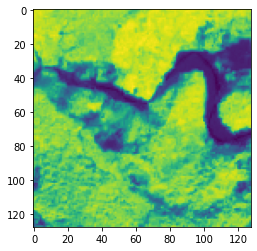

In [ ]:
f_data = np.zeros((1, 128,128, 3))
with h5py.File("image_2000.h5") as hdf:
    ls = list(hdf.keys())
    print("ls->", ls)
    data = np.array(hdf.get('img'))
    print("input data shape:", data.shape)
    plt.imshow(data[:, :, 3:0:-1])
    
    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]
    data_rgb = data[:, :, 3:0:-1]
    data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
    f_data[0, :, :, 0] =data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]
    f_data[0, :, :, 2] = data[:, :, 13]

    print("data ndvi shape ", data_ndvi.shape, "f_data shape: ", f_data.shape)
    plt.imshow(data_ndvi)

In [ ]:
print(os.getcwd())
os.chdir('/content/drive/MyDrive/Train/mask')
print(os.getcwd())

/content/drive/MyDrive/Train/img
/content/drive/MyDrive/Train/mask


ls ['mask']
input data shape: (128, 128)


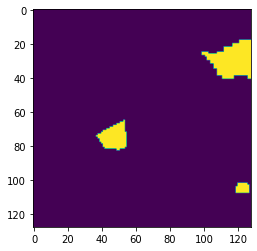

In [ ]:
with h5py.File("mask_2000.h5") as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)

# Using all dataset

In [ ]:
print(os.getcwd())
os.chdir('/content/drive/MyDrive')
print(os.getcwd())

/content/drive/MyDrive/Train/mask
/content/drive/MyDrive


In [ ]:
path_single = r"Train/img/image_10.h5"
path_single_mask = r'Train/mask/mask_1.h5'
TRAIN_PATH = r"Train/img/*.h5"
TRAIN_MASK = r'Train/mask/*.h5'

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

## Train with RGB, NDVI, DEM, and Slope 


In [ ]:
#testing for google colab GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TRAIN_XX[i, :, :, 3] = data_ndvi #NDVI
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION
    
    
    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data
    

0 Train/img/image_1.h5 Train/mask/mask_1.h5
1 Train/img/image_10.h5 Train/mask/mask_10.h5
2 Train/img/image_100.h5 Train/mask/mask_100.h5
3 Train/img/image_1000.h5 Train/mask/mask_1000.h5
4 Train/img/image_1001.h5 Train/mask/mask_1001.h5
5 Train/img/image_1002.h5 Train/mask/mask_1002.h5
6 Train/img/image_1003.h5 Train/mask/mask_1003.h5
7 Train/img/image_1004.h5 Train/mask/mask_1004.h5
8 Train/img/image_1005.h5 Train/mask/mask_1005.h5
9 Train/img/image_1006.h5 Train/mask/mask_1006.h5
10 Train/img/image_1007.h5 Train/mask/mask_1007.h5
11 Train/img/image_1008.h5 Train/mask/mask_1008.h5
12 Train/img/image_1009.h5 Train/mask/mask_1009.h5
13 Train/img/image_101.h5 Train/mask/mask_101.h5
14 Train/img/image_1010.h5 Train/mask/mask_1010.h5
15 Train/img/image_1011.h5 Train/mask/mask_1011.h5
16 Train/img/image_1012.h5 Train/mask/mask_1012.h5
17 Train/img/image_1013.h5 Train/mask/mask_1013.h5
18 Train/img/image_1014.h5 Train/mask/mask_1014.h5
19 Train/img/image_1015.h5 Train/mask/mask_1015.h5
20 T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


1670 Train/img/image_2501.h5 Train/mask/mask_2501.h5
1671 Train/img/image_2502.h5 Train/mask/mask_2502.h5
1672 Train/img/image_2503.h5 Train/mask/mask_2503.h5
1673 Train/img/image_2504.h5 Train/mask/mask_2504.h5
1674 Train/img/image_2505.h5 Train/mask/mask_2505.h5
1675 Train/img/image_2506.h5 Train/mask/mask_2506.h5
1676 Train/img/image_2507.h5 Train/mask/mask_2507.h5
1677 Train/img/image_2508.h5 Train/mask/mask_2508.h5
1678 Train/img/image_2509.h5 Train/mask/mask_2509.h5
1679 Train/img/image_251.h5 Train/mask/mask_251.h5
1680 Train/img/image_2510.h5 Train/mask/mask_2510.h5
1681 Train/img/image_2511.h5 Train/mask/mask_2511.h5
1682 Train/img/image_2512.h5 Train/mask/mask_2512.h5
1683 Train/img/image_2513.h5 Train/mask/mask_2513.h5
1684 Train/img/image_2514.h5 Train/mask/mask_2514.h5
1685 Train/img/image_2515.h5 Train/mask/mask_2515.h5
1686 Train/img/image_2516.h5 Train/mask/mask_2516.h5
1687 Train/img/image_2517.h5 Train/mask/mask_2517.h5
1688 Train/img/image_2518.h5 Train/mask/mask_251

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


2264 Train/img/image_3036.h5 Train/mask/mask_3036.h5
2265 Train/img/image_3037.h5 Train/mask/mask_3037.h5
2266 Train/img/image_3038.h5 Train/mask/mask_3038.h5
2267 Train/img/image_3039.h5 Train/mask/mask_3039.h5
2268 Train/img/image_304.h5 Train/mask/mask_304.h5
2269 Train/img/image_3040.h5 Train/mask/mask_3040.h5
2270 Train/img/image_3041.h5 Train/mask/mask_3041.h5
2271 Train/img/image_3042.h5 Train/mask/mask_3042.h5
2272 Train/img/image_3043.h5 Train/mask/mask_3043.h5
2273 Train/img/image_3044.h5 Train/mask/mask_3044.h5
2274 Train/img/image_3045.h5 Train/mask/mask_3045.h5
2275 Train/img/image_3046.h5 Train/mask/mask_3046.h5
2276 Train/img/image_3047.h5 Train/mask/mask_3047.h5
2277 Train/img/image_3048.h5 Train/mask/mask_3048.h5
2278 Train/img/image_3049.h5 Train/mask/mask_3049.h5
2279 Train/img/image_305.h5 Train/mask/mask_305.h5
2280 Train/img/image_3050.h5 Train/mask/mask_3050.h5
2281 Train/img/image_3051.h5 Train/mask/mask_3051.h5
2282 Train/img/image_3052.h5 Train/mask/mask_3052.

## Testing min, max values in train data

In [ ]:
# TRAIN_XX_n = TRAIN_XX / TRAIN_XX.max()
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


## Custom loss function (Dice Loss)

In [ ]:
def dice_loss(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.math.sigmoid(y_pred)
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)

  return 1 - numerator / denominator

## Visualization of the training data

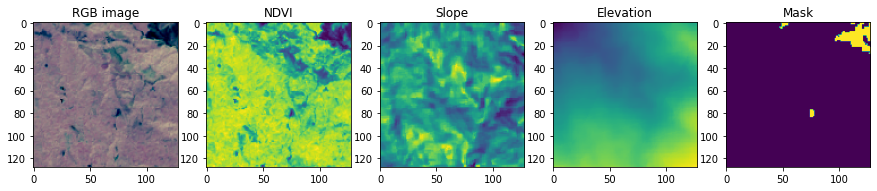

In [ ]:
img=216
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(TRAIN_XX[img, :, :, 0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

## Validation split

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.2, shuffle= True)

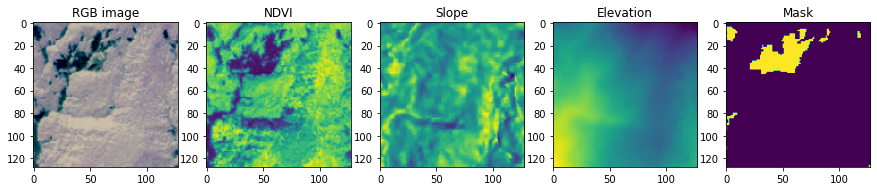

In [ ]:
img=1648
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))
ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(x_train[img, :, :, 5])
ax5.imshow(y_train[img, :, :, 0])

In [ ]:
x_train.shape, y_train.shape

((3039, 128, 128, 6), (3039, 128, 128, 1))

In [ ]:
# to release some memory, delete the unnecessary variable
del TRAIN_XX
del TRAIN_YY
del all_train
del all_mask 

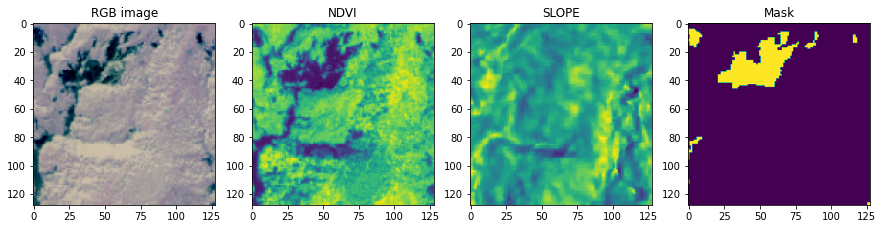

In [ ]:
img=1648
fig,(ax1,ax2, ax3, ax4)= plt.subplots(1,4,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("SLOPE")
ax4.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(y_train[img, :, :, 0])



```
`# This is formatted as code`
```

# Unet Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

# recall 
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

# precision
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

#f1 score
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [ ]:
#from utils import recall_m, precision_m, f1_m
def unet_model(IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS))

    # Converted inputs to floating
    #s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)


    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])
    
    return model

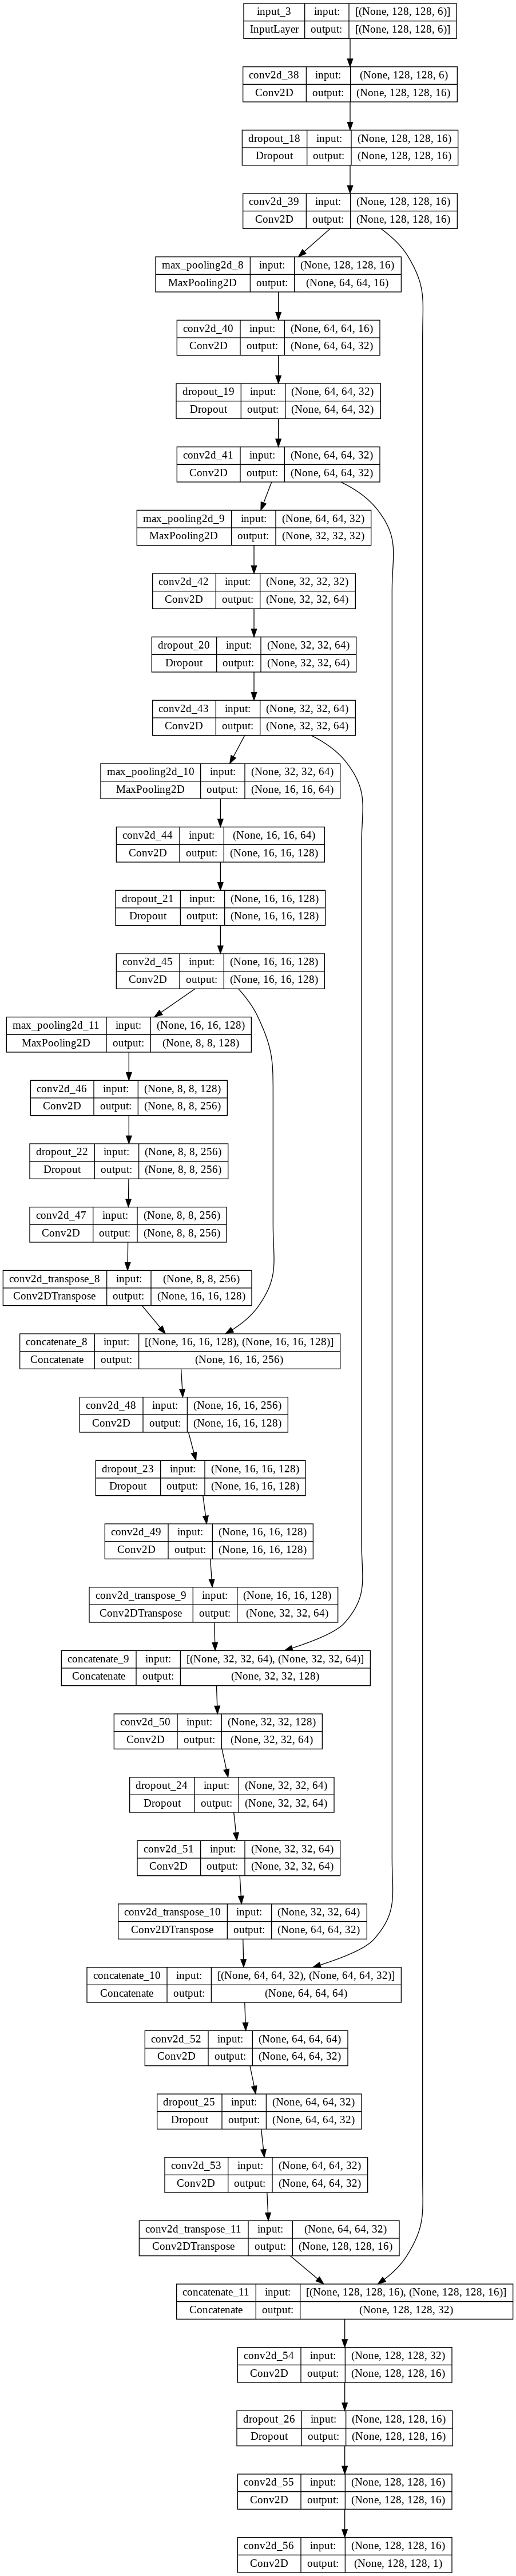

In [ ]:
model = unet_model(128, 128, 6)
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model = unet_model(128, 128, 6)
# model.summary()
checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model.h5", monitor="val_f1_m", verbose=1, save_best_only=True, mode="max")
# earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10, verbose=1, mode='max')

callbacks = [
    # earlyStopping,
    checkpointer
    ]
history = model.fit(x_train, y_train, batch_size=16,  
          epochs=100, 
          verbose = 2,
          validation_data=(x_valid, y_valid),
          callbacks=callbacks)

model.save("model_save.h5")

Epoch 1/100

Epoch 1: val_f1_m improved from -inf to 0.49858, saving model to best_model.h5
190/190 - 25s - loss: 0.0723 - accuracy: 0.9784 - f1_m: 0.3901 - precision_m: 0.5580 - recall_m: 0.3414 - val_loss: 0.0469 - val_accuracy: 0.9837 - val_f1_m: 0.4986 - val_precision_m: 0.7601 - val_recall_m: 0.3819 - 25s/epoch - 134ms/step
Epoch 2/100

Epoch 2: val_f1_m improved from 0.49858 to 0.54133, saving model to best_model.h5
190/190 - 9s - loss: 0.0490 - accuracy: 0.9826 - f1_m: 0.5586 - precision_m: 0.6966 - recall_m: 0.5005 - val_loss: 0.0461 - val_accuracy: 0.9838 - val_f1_m: 0.5413 - val_precision_m: 0.7194 - val_recall_m: 0.4477 - 9s/epoch - 45ms/step
Epoch 3/100

Epoch 3: val_f1_m improved from 0.54133 to 0.60446, saving model to best_model.h5
190/190 - 8s - loss: 0.0433 - accuracy: 0.9839 - f1_m: 0.5877 - precision_m: 0.7031 - recall_m: 0.5276 - val_loss: 0.0383 - val_accuracy: 0.9856 - val_f1_m: 0.6045 - val_precision_m: 0.7413 - val_recall_m: 0.5187 - 8s/epoch - 44ms/step
Epoch 4

In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.03590487316250801 0.988275945186615 0.6988298296928406 0.7892737984657288 0.6293085217475891


# Prediction

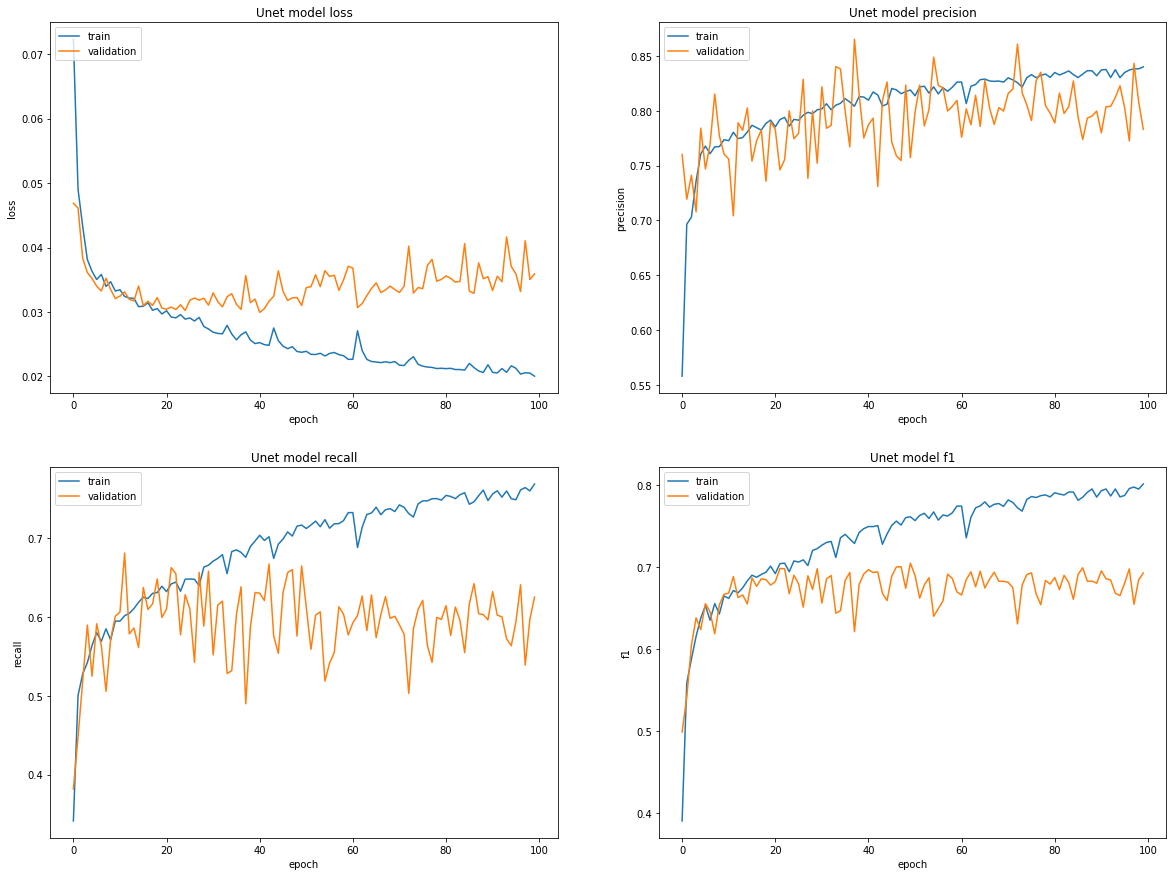

In [ ]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('Unet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('Unet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('Unet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

In [ ]:
threshold = 0.5
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

24/24 [==============================] - 1s 26ms/step


Text(0.5, 1.0, 'Training Image')

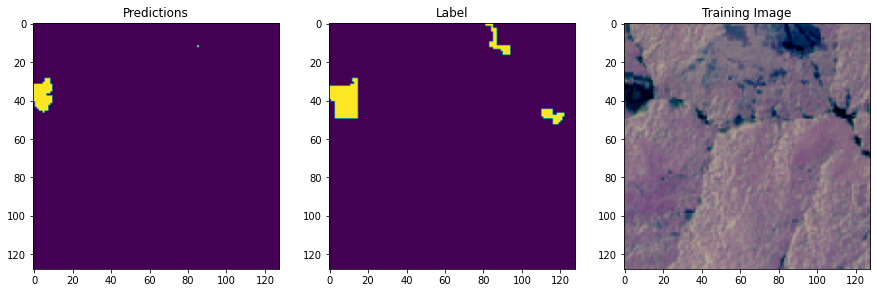

In [ ]:
img = 155
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

Text(0.5, 1.0, 'Training Image')

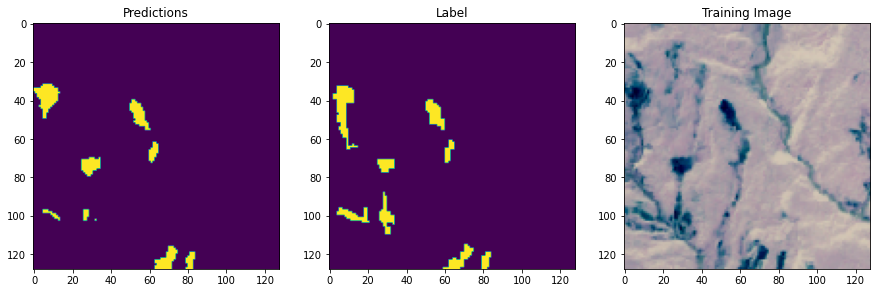

In [ ]:
img = 153
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

# Validation data 

In [ ]:
validation_url = r'/content/drive/MyDrive/Valid/img/*.h5'
img_val = sorted(glob.glob(validation_url))

VAL_XX = np.zeros((245, 128, 128, 6))
mask_name = []
for i, img in enumerate(img_val):
    print(i, img)
    mask_name.append(img.split('/')[-1].replace('image', 'mask'))
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        VAL_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb #RED
        VAL_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        VAL_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        VAL_XX[i, :, :, 3] = data_ndvi #NDVI
        VAL_XX[i, :, :, 4] = 1- data[:, :, 13] / mid_slope #SLOPE
        VAL_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION

0 /content/drive/MyDrive/Valid/img/image_1.h5
1 /content/drive/MyDrive/Valid/img/image_10.h5
2 /content/drive/MyDrive/Valid/img/image_100.h5
3 /content/drive/MyDrive/Valid/img/image_101.h5
4 /content/drive/MyDrive/Valid/img/image_102.h5
5 /content/drive/MyDrive/Valid/img/image_103.h5
6 /content/drive/MyDrive/Valid/img/image_104.h5
7 /content/drive/MyDrive/Valid/img/image_105.h5
8 /content/drive/MyDrive/Valid/img/image_106.h5
9 /content/drive/MyDrive/Valid/img/image_107.h5
10 /content/drive/MyDrive/Valid/img/image_108.h5
11 /content/drive/MyDrive/Valid/img/image_109.h5
12 /content/drive/MyDrive/Valid/img/image_11.h5
13 /content/drive/MyDrive/Valid/img/image_110.h5
14 /content/drive/MyDrive/Valid/img/image_111.h5
15 /content/drive/MyDrive/Valid/img/image_112.h5
16 /content/drive/MyDrive/Valid/img/image_113.h5
17 /content/drive/MyDrive/Valid/img/image_114.h5
18 /content/drive/MyDrive/Valid/img/image_115.h5
19 /content/drive/MyDrive/Valid/img/image_116.h5
20 /content/drive/MyDrive/Valid/im

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


189 /content/drive/MyDrive/Valid/img/image_49.h5
190 /content/drive/MyDrive/Valid/img/image_5.h5
191 /content/drive/MyDrive/Valid/img/image_50.h5
192 /content/drive/MyDrive/Valid/img/image_51.h5
193 /content/drive/MyDrive/Valid/img/image_52.h5
194 /content/drive/MyDrive/Valid/img/image_53.h5
195 /content/drive/MyDrive/Valid/img/image_54.h5
196 /content/drive/MyDrive/Valid/img/image_55.h5
197 /content/drive/MyDrive/Valid/img/image_56.h5
198 /content/drive/MyDrive/Valid/img/image_57.h5
199 /content/drive/MyDrive/Valid/img/image_58.h5
200 /content/drive/MyDrive/Valid/img/image_59.h5
201 /content/drive/MyDrive/Valid/img/image_6.h5
202 /content/drive/MyDrive/Valid/img/image_60.h5
203 /content/drive/MyDrive/Valid/img/image_61.h5
204 /content/drive/MyDrive/Valid/img/image_62.h5
205 /content/drive/MyDrive/Valid/img/image_63.h5
206 /content/drive/MyDrive/Valid/img/image_64.h5
207 /content/drive/MyDrive/Valid/img/image_65.h5
208 /content/drive/MyDrive/Valid/img/image_66.h5
209 /content/drive/MyD

## Prediction for validation data

In [ ]:
threshold = 0.5
pred_img = model.predict(VAL_XX)
pred_img = (pred_img > threshold).astype(np.uint8)
pred_img.shape

8/8 [==============================] - 0s 31ms/step


(245, 128, 128, 1)

## Visualization of validation image

Text(0.5, 1.0, 'Training Image')

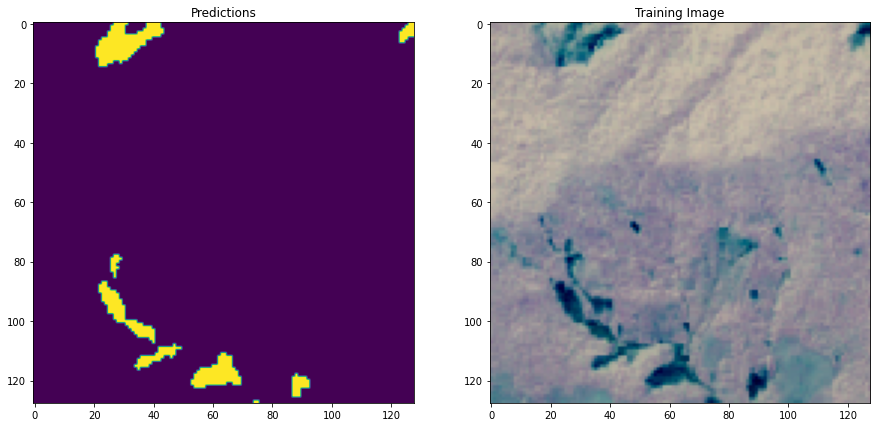

In [ ]:
img = 167
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Training Image')

In [ ]:
print(os.getcwd())
os.chdir('/content/drive/MyDrive/Valid')
print(os.getcwd())
#os.makedirs('mask')

/content/drive/MyDrive/Valid
/content/drive/MyDrive/Valid


In [ ]:
write_directory = r'/content/drive/MyDrive/Valid/mask'
for i, name in enumerate(mask_name):
  h5f = h5py.File(write_directory + "/" + name, 'w')
  # change the dimention of prediction to (n, 128, 128)
  pred_mask = pred_img[i, :, :, 0]

  # write to the directory
  h5f.create_dataset('mask', data = pred_mask)
  h5f.close()

# Thank you!